# Regression Model - prediction of movies box-office based on YouTube trailers statistics

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as split
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Load the dataset that contains movies statistics 
dt = pd.read_excel("movies_stats.xlsx")
dt.head(10)

,Year,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Re-Release,Views,Likes,Comments
0,2022,1,Top Gun: Maverick,"$662,486,308",4751,"$662,486,308",2022-05-27,Paramount Pictures,NaN,39587354,391175,37785
1,2022,2,Doctor Strange in the Multiverse of Madness,"$411,327,261",4534,"$411,327,261",2022-05-06,Walt Disney Studios Motion Pictures,NaN,108081575,4036056,140683
2,2022,3,Jurassic World Dominion,"$371,865,200",4697,"$371,865,200",2022-06-10,Universal Pictures,NaN,92267489,1198934,67677
3,2022,6,Thor: Love and Thunder,"$316,170,072",4375,"$316,170,072",2022-07-08,Walt Disney Studios Motion Pictures,NaN,98001781,3387512,130067
4,2022,8,Sonic the Hedgehog 2,"$190,872,904",4258,"$190,872,904",2022-04-08,Paramount Pictures,NaN,35604838,491418,0
5,2022,9,Uncharted,"$148,649,929",4275,"$148,648,820",2022-02-18,Sony Pictures Entertainment (SPE),NaN,38340946,587917,37113
6,2022,12,The Lost City,"$105,344,029",4283,"$105,344,029",2022-03-25,Paramount Pictures,NaN,25433183,70979,3386
7,2022,13,Nope,"$97,969,630",3807,"$97,969,630",2022-07-22,Universal Pictures,NaN,24653399,229575,18908
8,2022,14,The Bad Guys,"$96,713,440",4042,"$96,713,440",2022-04-22,Universal Pictures,NaN,51554405,179214,0
9,2022,15,Fantastic Beasts: The Secrets of Dumbledore,"$95,850,844",4245,"$95,850,844",2022-04-15,Warner Bros.,NaN,47238554,656598,36260


In [3]:
# Filter dataset to remove the "Pandemic effect" on movies box-office
dt = dt[dt['Year'] < 2020]

In [4]:
# Transform Gross and Total Gross to numeric data
dt["Gross"] = dt["Gross"].str.replace("$", "")
dt["Gross"] = dt["Gross"].str.replace(",", "")
dt["Total Gross"] = dt["Total Gross"].str.replace("$", "")
dt["Total Gross"] = dt["Total Gross"].str.replace(",", "")
dt["Gross"] = pd.to_numeric(dt["Gross"])
dt["Total Gross"] = pd.to_numeric(dt["Total Gross"])

C:\Users\ander\AppData\Local\Temp\ipykernel_11568\2620236493.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dt["Gross"] = dt["Gross"].str.replace("$", "")
C:\Users\ander\AppData\Local\Temp\ipykernel_11568\2620236493.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dt["Total Gross"] = dt["Total Gross"].str.replace("$", "")


In [6]:
# Dataset overview
dt.describe(include="all")

C:\Users\ander\AppData\Local\Temp\ipykernel_11568\3897017379.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dt.describe(include="all")


,Year,Rank,Release,Gross,Theaters,Total Gross,Release Date,Distributor,Re-Release,Views,Likes,Comments
count,338.000000,338.000000,338,3.380000e+02,338.0,3.380000e+02,338,338,0.0,3.380000e+02,3.380000e+02,338.000000
unique,NaN,NaN,338,NaN,325.0,NaN,196,20,NaN,NaN,NaN,NaN
top,NaN,NaN,Avengers: Endgame,NaN,3502.0,NaN,2016-12-25 00:00:00,Warner Bros.,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,3.0,NaN,5,68,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-25 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2017.458580,71.863905,NaN,8.079423e+07,NaN,8.690069e+07,NaN,NaN,NaN,2.411379e+07,2.012135e+05,18326.449704
std,1.113606,46.980889,NaN,1.093258e+08,NaN,1.120946e+08,NaN,NaN,NaN,3.279014e+07,5.321484e+05,50752.722548
min,2016.000000,1.000000,NaN,2.716368e+06,NaN,2.716368e+06,NaN,NaN,NaN,1.900000e+02,0.000000e+00,0.000000
25%,2016.000000,34.000000,NaN,2.217185e+07,NaN,2.569362e+07,NaN,NaN,NaN,6.804608e+06,2.006700e+04,1303.000000


Text(0, 0.5, 'Frequency')

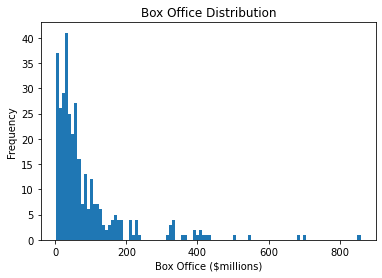

In [7]:
# Histogram of Box Office (Gross)
dt_gross = dt["Total Gross"]/1000000
plt.hist(dt_gross, bins=100)
plt.title('Box Office Distribution')
plt.xlabel('Box Office ($millions)')
plt.ylabel('Frequency')

In [8]:
# Correlations between numerical varibles
corr_Matrix = dt.corr()
print(corr_Matrix)

                 Year      Rank     Gross  Total Gross  Re-Release     Views  \
Year         1.000000 -0.068509  0.065028     0.049449         NaN  0.128195   
Rank        -0.068509  1.000000 -0.653807    -0.636664         NaN -0.452340   
Gross        0.065028 -0.653807  1.000000     0.976022         NaN  0.723819   
Total Gross  0.049449 -0.636664  0.976022     1.000000         NaN  0.725848   
Re-Release        NaN       NaN       NaN          NaN         NaN       NaN   
Views        0.128195 -0.452340  0.723819     0.725848         NaN  1.000000   
Likes        0.180117 -0.352605  0.703729     0.693509         NaN  0.916761   
Comments     0.126779 -0.326001  0.622309     0.607493         NaN  0.863178   

                Likes  Comments  
Year         0.180117  0.126779  
Rank        -0.352605 -0.326001  
Gross        0.703729  0.622309  
Total Gross  0.693509  0.607493  
Re-Release        NaN       NaN  
Views        0.916761  0.863178  
Likes        1.000000  0.901941  
Comment

In [9]:
# Sorting correlation metrics on Total Gross
corr_Matrix["Total Gross"].sort_values(ascending=False)

Total Gross    1.000000
Gross          0.976022
Views          0.725848
Likes          0.693509
Comments       0.607493
Year           0.049449
Rank          -0.636664
Re-Release          NaN
Name: Total Gross, dtype: float64

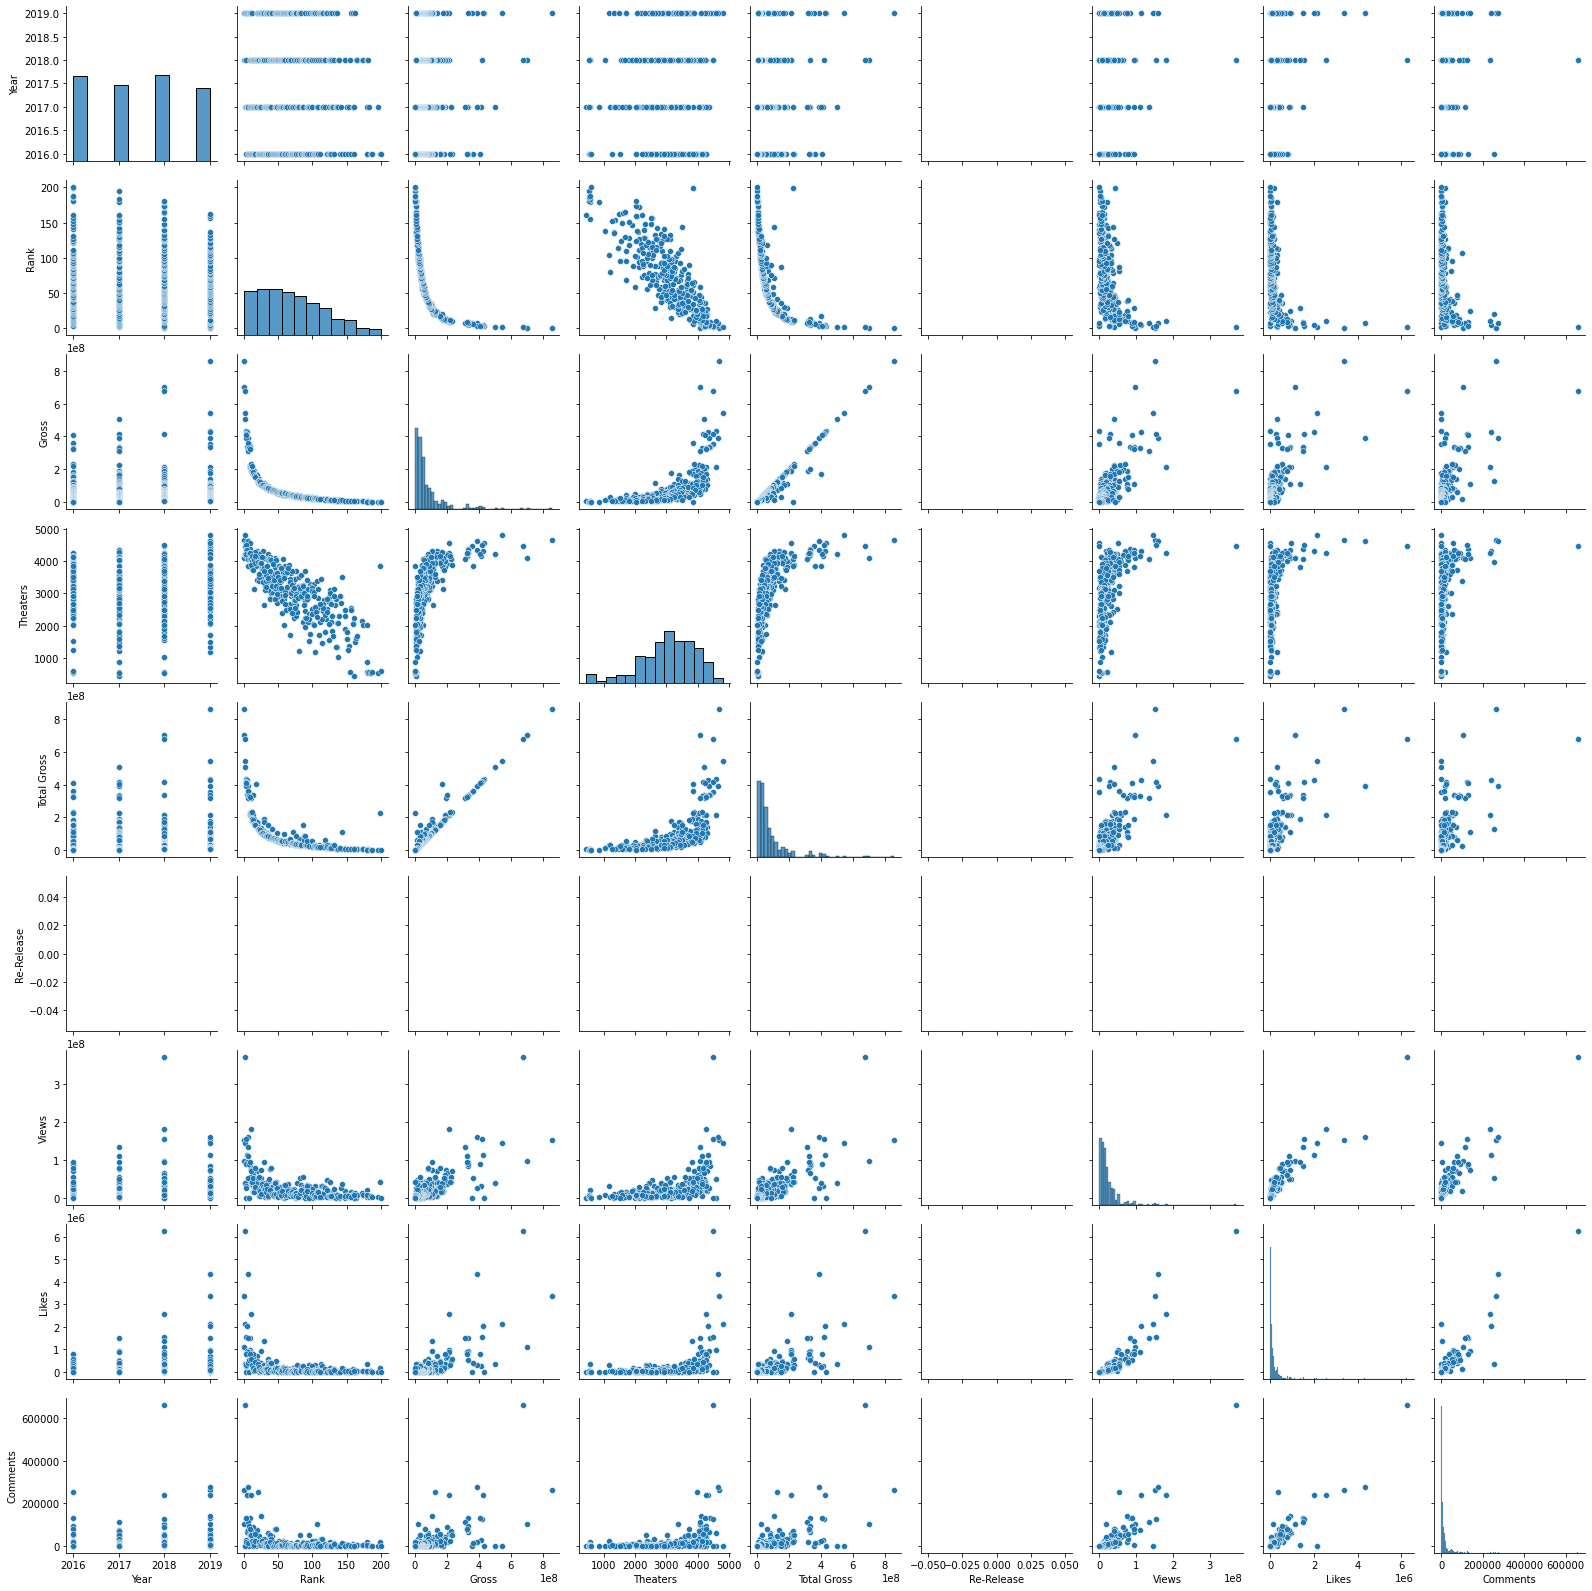

In [10]:
# Graphical representation of correlation
sns.pairplot(dt)

C:\Users\ander\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


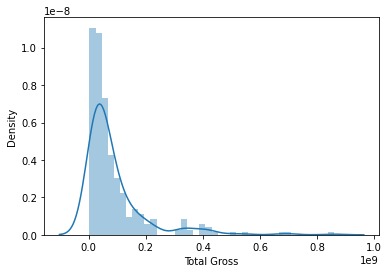

<Figure size 432x288 with 0 Axes>

In [11]:
# Plot the Total Gross distribution
sns.distplot(dt["Total Gross"])
fig = plt.figure()

C:\Users\ander\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


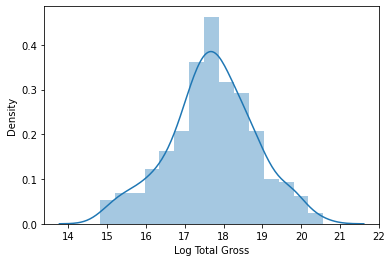

<Figure size 432x288 with 0 Axes>

In [12]:
# Plot the log of Total Gross distribution
dt["Log Total Gross"] = np.log(dt["Total Gross"])
sns.distplot(dt["Log Total Gross"])
fig = plt.figure()

In [13]:
# Get the target (Y) and predictor (X) variables for the linear model
#X = dt.loc[:,"Views":"Comments"]
X = dt[["Views"]]
#X = dt.loc[:,"Views":"Likes"]
#Y = dt[["Gross"]]
#X = dt.loc[:,"# Videos":"Comments"]
Y = dt[["Total Gross"]]
#Y = dt[["Log Total Gross"]]
#print(Y)
# Fit a Linear Regression Model to predict revenue based on movie diretors
model = lr()
model.fit(X,Y)

LinearRegression()

In [14]:
# Regression model summary results
X_sm = sm.add_constant(X)

ln_model = sm.OLS(Y, X_sm).fit()
print(ln_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Gross   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     374.1
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           1.50e-56
Time:                        23:59:21   Log-Likelihood:                -6617.4
No. Observations:                 338   AIC:                         1.324e+04
Df Residuals:                     336   BIC:                         1.325e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.707e+07   5.22e+06      5.189      0.0

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# Split the dataset in train (2/3) and test (1/3) dataset
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.33, random_state=42)

In [16]:
# Train the model with the train dataset
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
# Regression results with X_train
X_sm_train = sm.add_constant(X_train)

ln_model_train = sm.OLS(Y_train, X_sm_train).fit()
print(ln_model_train.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Gross   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     228.4
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           4.85e-36
Time:                        23:59:21   Log-Likelihood:                -4405.6
No. Observations:                 226   AIC:                             8815.
Df Residuals:                     224   BIC:                             8822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.008e+07   6.21e+06      3.232      0.0

C:\Users\ander\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
#predict on the X_test dataset
Y_pred = model.predict(X_test)

# R SQUARED
print("R2: ", sklearn.metrics.r2_score(Y_test, Y_pred))

# MEAN ABSOLUTE ERROR 
print("MAE: ", sklearn.metrics.mean_absolute_error(Y_test, Y_pred))

# RMSE
print("RSME: ", sklearn.metrics.mean_squared_error(Y_test, Y_pred, squared=False))

R2:  0.540133803784576
MAE:  51571660.26807546
RSME:  88893455.0112645


In [19]:
## Calculate residuals
residuals = Y_test - Y_pred
max_error = residuals["Total Gross"].max() if abs(residuals["Total Gross"].max()) > abs(residuals["Total Gross"].min()) else residuals["Total Gross"].min()
max_idx = list(residuals["Total Gross"]).index(residuals["Total Gross"].max()) if abs(residuals["Total Gross"].max()) > abs(residuals["Total Gross"].min()) else list(residuals["Total Gross"]).index(residuals["Total Gross"].min())
max_true, max_pred = Y_test.iloc[max_idx], Y_pred[max_idx]

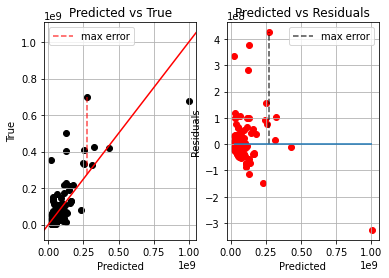

In [20]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(Y_pred, Y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()

## Plot predicted vs residuals
ax[1].scatter(Y_pred, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(Y_pred), xmax=np.max(Y_pred))
ax[1].legend()
plt.show()

# End